## ELETTRA-01: Layout

In [1]:
# In this example ELEGANT lattice is loaded and corresponding 3D layout is displayed

In [2]:
from pathlib import Path

from model.command.external import load_lattice
from model.command.build import build
from model.command.layout import Layout

from plotly import graph_objects

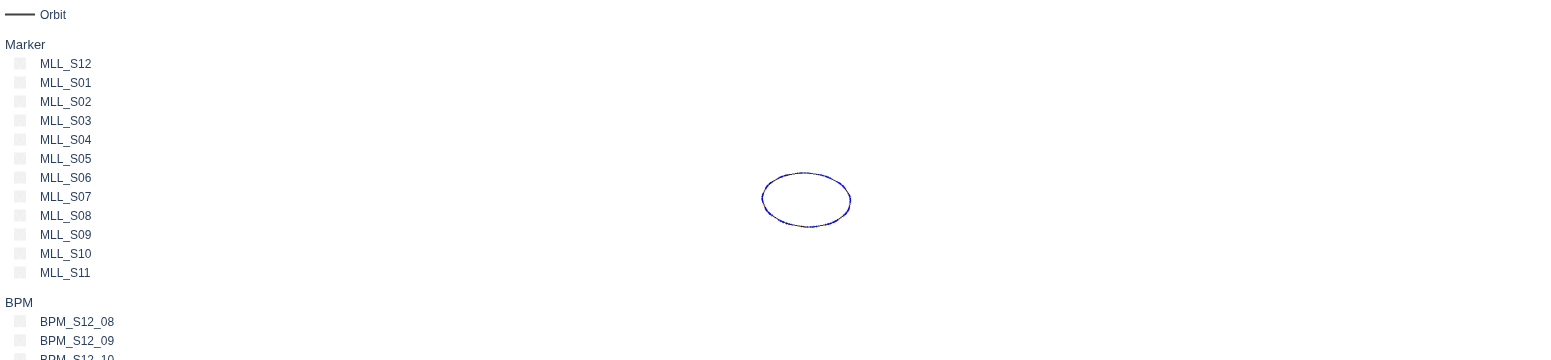

In [3]:
# Build elettra lattice

file = Path('./elettra.lte')
data = load_lattice(file)
ring = build('RING', 'ELEGANT', data)

ring.flatten()
ring.remove_group(pattern=r'^(?!MLL_).*', kinds=['Marker'])
ring.merge()


# Slice dipoles

ring.ns = (('Dipole', 0.05), )

# Profile
layout = Layout(ring)

# Generate reference orbit

x, y, z = layout.orbit(flat=False, step=None, start=(0, 0))

# Generate layout (can be saved as html with write_html method)

blocks = layout.profile_3d(scale=2.5, exclude=['Drift'])

# Plot

figure = graph_objects.Figure(
    data=[
        graph_objects.Scatter3d(
            x=x.numpy(),
            y=y.numpy(),
            z=z.numpy(), 
            mode='lines',
            name='Orbit',
            line=dict(color='black',width=2.0,dash='solid'),
            opacity=0.75,
            showlegend=True
        ),   
        *[graph_objects.Mesh3d(block) for block in blocks]
    ]
)
figure.update_layout(
    scene=dict(
        xaxis=dict(visible=False, range=[-100,100]),
        yaxis=dict(visible=False, range=[-100,100]),
        zaxis=dict(visible=False, range=[-25,25]),
        aspectratio=dict(x=1, y=1, z=1/4),
        annotations=[]
    ),
    margin=dict(l=0, r=0, t=0, b=0),
    legend=dict(orientation='v', x=0., y=1., xanchor='left', yanchor='top'),
    hoverlabel=dict(font_size=12, font_family="Rockwell", font_color='white'),
    legend_groupclick='toggleitem'
)
figure.show()